<a href="https://colab.research.google.com/github/Ayush-Mukherjee1105/NLP-project/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HANDLING MISSING VALUES

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import shutil

# Load dataset
df = pd.read_csv("/content/Combined Data.csv")



# Drop missing values
df.dropna(subset=['statement'], inplace=True)

# Initialize tools
shutil.rmtree('/root/nltk_data')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(lemmatized_tokens)

# Apply preprocessing
df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Save cleaned dataset
df.to_csv("Preprocessed_Data.csv", index=False)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


EXTRACTION METHODS

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 features

# Fit and transform the cleaned text
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_statement'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Save as CSV
tfidf_df.to_csv("TFIDF_Features.csv", index=False)


VISUALIZATION

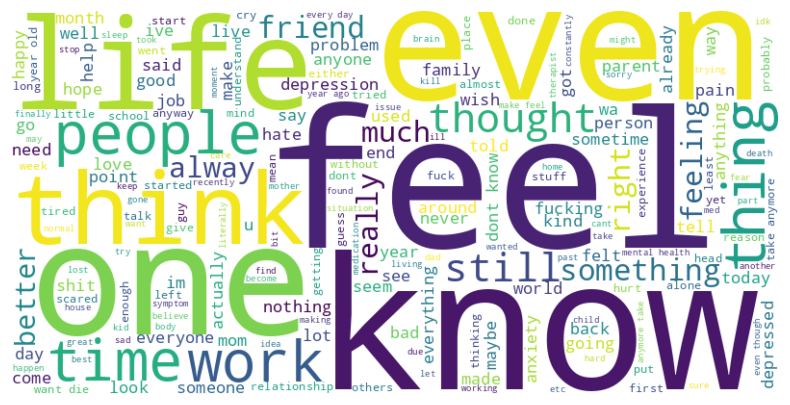

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_statement']))

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


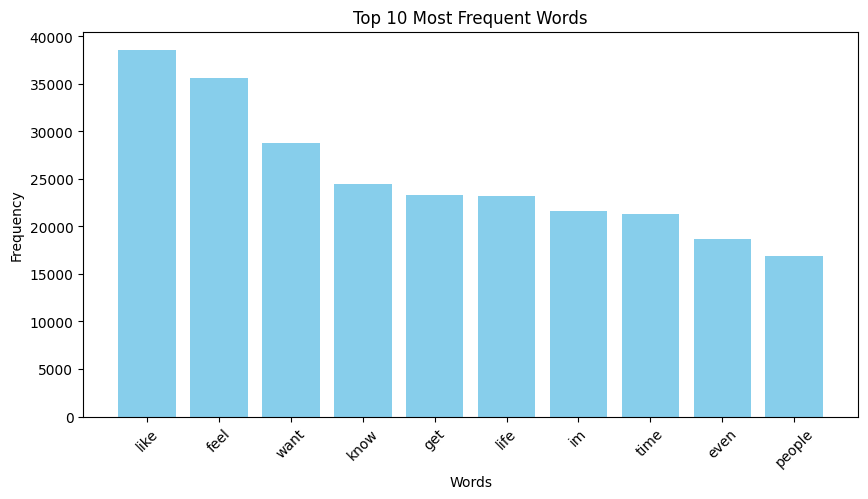

In [ ]:
from collections import Counter

# Count word frequencies
all_words = " ".join(df['cleaned_statement']).split()
word_freq = Counter(all_words)

# Get top 10 words
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# Plot Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()


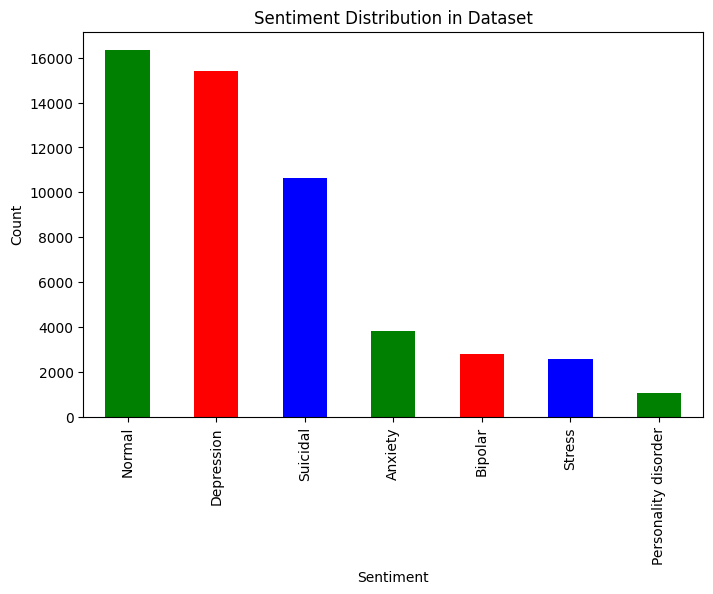

In [ ]:
# Check sentiment distribution
plt.figure(figsize=(8, 5))
df['status'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Dataset")
plt.show()


In [ ]:
df.to_csv("Processed_Data_with_Visuals.csv", index=False)
